In [1]:

# Acknowledgement: https://github.com/adl1995/generalised-hough-transform

import numpy as np
from skimage.io import imread, imshow
from scipy.ndimage import convolve
from skimage import io
import matplotlib.pyplot as plt

# import numpy as np
# from scipy.ndimage import convolve
# from build_reference_table import *
# from skimage import io
# import matplotlib.pyplot as plt


# import matplotlib.pyplot as plt
# from build_reference_table import *
# from match_table import *
# from find_maxima import *
# import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


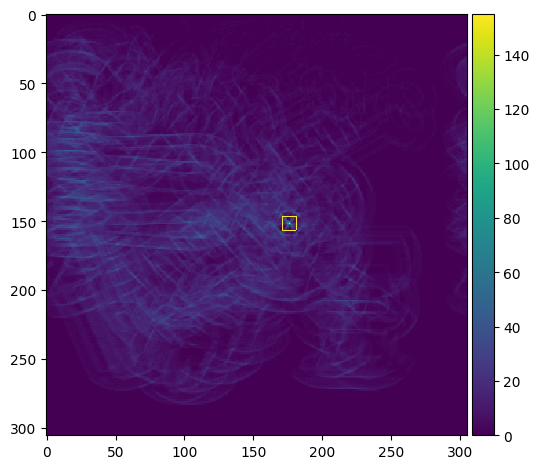

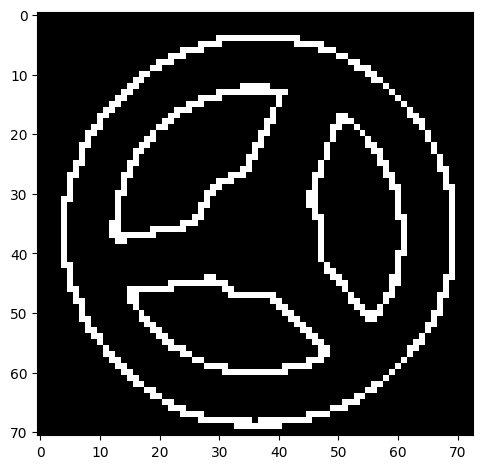

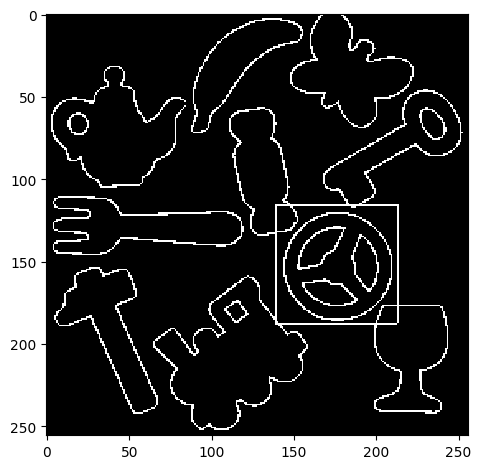

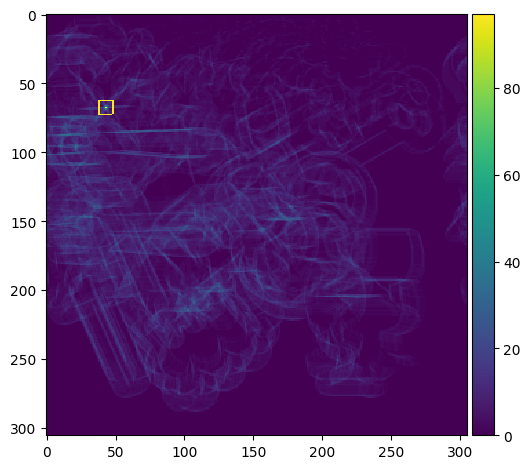

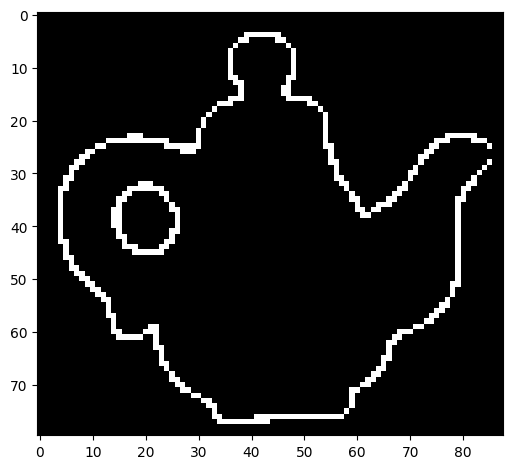

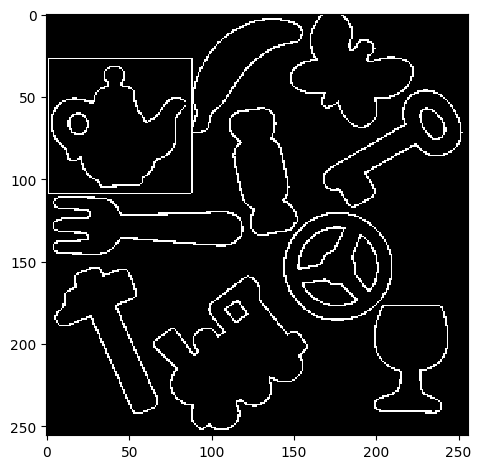

In [2]:
def findMaxima(acc):
    """
    :param acc: accumulator array
    :return:
        maxval: maximum value found
        ridx: row index of the maxval
        cidx: column index of the maxval
    """
    ridx, cidx = np.unravel_index(acc.argmax(), acc.shape)
    return [acc[ridx, cidx], ridx, cidx]



def buildRefTable(img):
    """
    builds the reference table for the given input template image
    :param im: input binary image
    :return:
        table = a reconstructed reference table...
    """
    table = [[0 for x in range(1)] for y in range(90)]  # creating a empty list
    # r will be calculated corresponding to this point
    img_center = [int(img.shape[0]/2), int(img.shape[1]/2)]

    def findAngleDistance(x1, y1):
        x2, y2 = img_center[0], img_center[1]
        r = [(x2-x1), (y2-y1)]
        if (x2-x1 != 0):
            return [int(np.rad2deg(np.arctan(int((y2-y1)/(x2-x1))))), r]
        else:
            return [0, 0]

    filter_size = 3
    for x in range(img.shape[0]-(filter_size-1)):
        for y in range(img.shape[1]-(filter_size-1)):
            if (img[x, y] != 0):
                theta, r = findAngleDistance(x, y)
                if (r != 0):
                    table[np.absolute(theta)].append(r)

    for i in range(len(table)):
        table[i].pop(0)

    return table



def matchTable(im, table):
    """
    :param im: input binary image, for searching template
    :param table: table for template
    :return:
        accumulator with searched votes
    """
    # matches the reference table with the given input
    # image for testing generalized Hough Transform
    m, n = im.shape
    acc = np.zeros((m+50, n+50))  # acc array requires some extra space

    def findGradient(x, y):
        if (x != 0):
            return int(np.rad2deg(np.arctan(int(y/x))))
        else:
            return 0

    for x in range(1, im.shape[0]):
        for y in range(im.shape[1]):

            if im[x, y] != 0:  # boundary point
                theta = findGradient(x, y)
                vectors = table[theta]
                for vector in vectors:
                    acc[vector[0]+x, vector[1]+y] += 1
    return acc


# images = ['Input1Ref.png', 'Input2Ref.png']
images = ['/kaggle/input/houghdata/Input1Ref.png', '/kaggle/input/houghdata/Input2Ref.png']

for img in images:
    refim = imread(img)
#     im = imread('Input1.png')
    im = imread('/kaggle/input/houghdata/Input1.png')

    table = buildRefTable(refim)
    acc = matchTable(im, table)
    val, ridx, cidx = findMaxima(acc)
    # code for drawing bounding-box in accumulator array...

    acc[ridx - 5:ridx + 5, cidx - 5] = val
    acc[ridx - 5:ridx + 5, cidx + 5] = val

    acc[ridx - 5, cidx - 5:cidx + 5] = val
    acc[ridx + 5, cidx - 5:cidx + 5] = val

    plt.figure(1)
    imshow(acc)
    plt.show()

    # code for drawing bounding-box in original image at the found location...

    # find the half-width and height of template
    hheight = np.floor(refim.shape[0] / 2) + 1
    hwidth = np.floor(refim.shape[1] / 2) + 1

    # find coordinates of the box
    rstart = int(max(ridx - hheight, 1))
    rend = int(min(ridx + hheight, im.shape[0] - 1))
    cstart = int(max(cidx - hwidth, 1))
    cend = int(min(cidx + hwidth, im.shape[1] - 1))

    # draw the box
    im[rstart:rend, cstart] = 255
    im[rstart:rend, cend] = 255

    im[rstart, cstart:cend] = 255
    im[rend, cstart:cend] = 255

    # show the image
    plt.figure(2), imshow(refim)
    plt.figure(3), imshow(im)
    plt.show()
